# <center> Machine Learning </center>
## <center> Lab 2 </center>

# Exercises for Pass (G) #

## Part 1 - Dimensionality reduction

Keys in the loaded data:  dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
(500, 400) (500,)


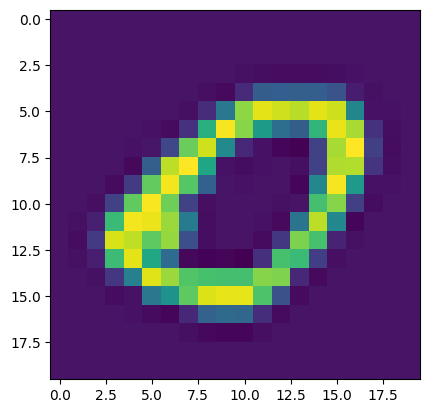

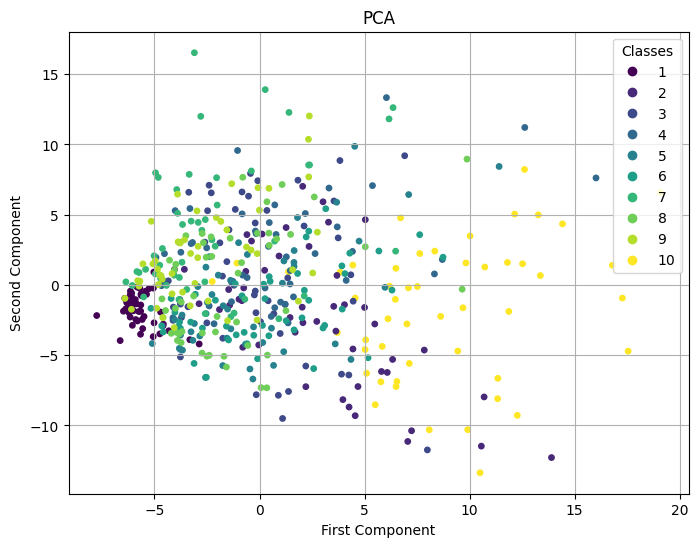

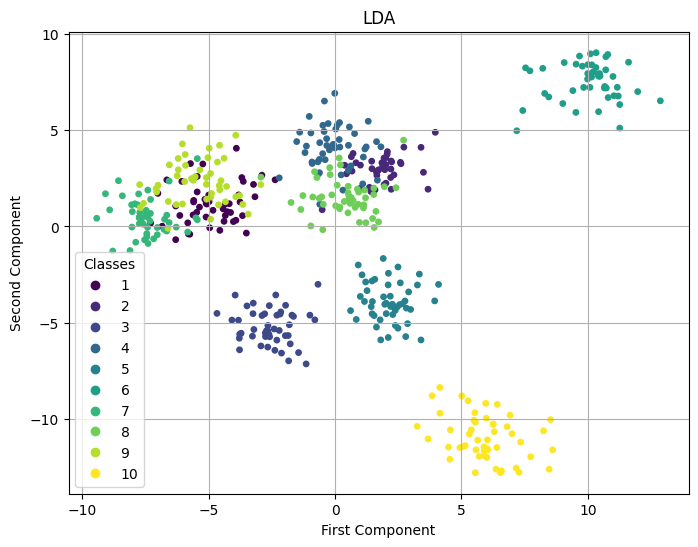

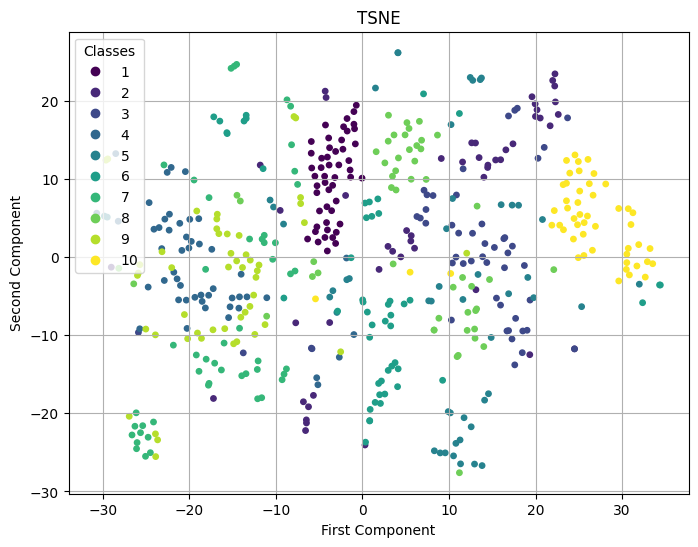

In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Function to plot data
def plot_data(X, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=15)
    plt.xlabel('First Component')
    plt.ylabel('Second Component')
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True)
    plt.show()
    
# Load Data
data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
print("Keys in the loaded data: ", data.keys())
X = data['X'][::10]  # Subsample data for visualization
y = data['y'][::10].flatten()
print(X.shape,y.shape)

# The variable X contains 5000 images (500 per digit). Each image is 20x20 pixels big, so the total number of features
# per image is 400. The variable y is the labelvector where y(i) = k means instance i belongs to digit k except for 
# k = 10 which represents the digit 0. 

# =============== Your code here ============================
# Step 1: Visualize the first image X[0]. Use plt.imshow and reshape X[0] to 20-by-20

plt.imshow(X[0].reshape(20,20))
plt.show()

# Step 2: Normalize the data, e.g., with StandardScaler().fit_transform(X)

X_norm = StandardScaler().fit_transform(X)

# Step 3: Use PCA, LDA, and TSNE with n_components=2 to project the data down to two dimensions using each method

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_norm, y)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_norm)

# Step 4: use plot_data to plot the data

plot_data(X_pca, y, "PCA")
plot_data(X_lda, y, "LDA")
plot_data(X_tsne, y, "TSNE")

# =============================================================


## Part 2 - Clustering

(1000, 2)


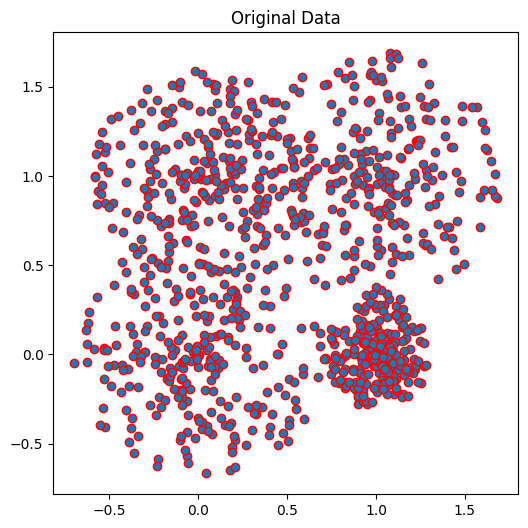

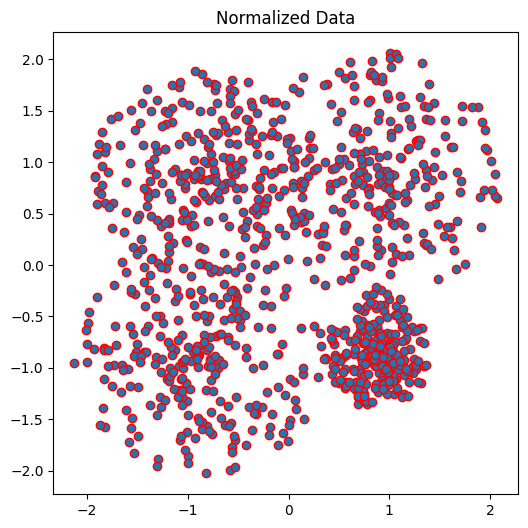

Normalized shape: (1000, 2)
Normalized mean: 0.0, Normalized std: 1.0


/Users/johanlind/PycharmProjects/MLLab1/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


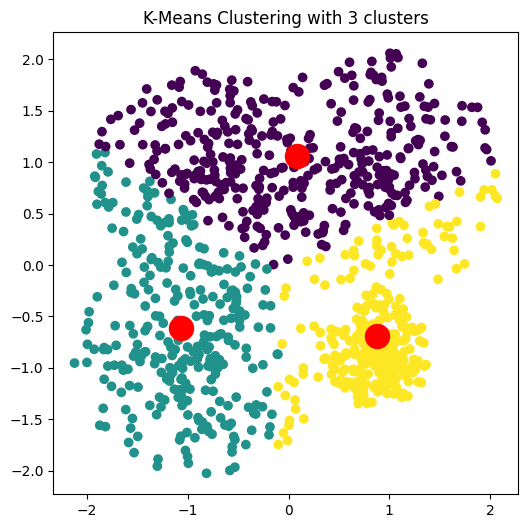

/Users/johanlind/PycharmProjects/MLLab1/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


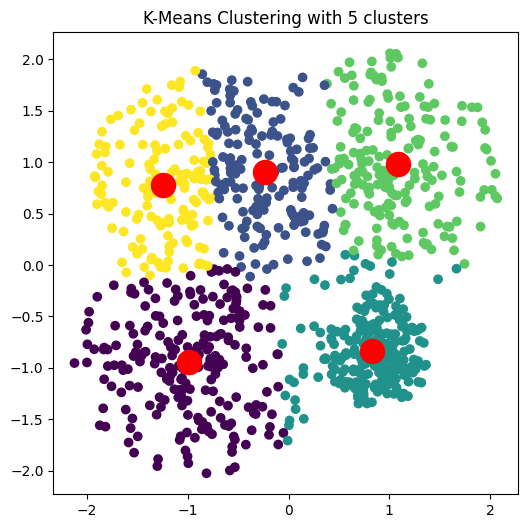

/Users/johanlind/PycharmProjects/MLLab1/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


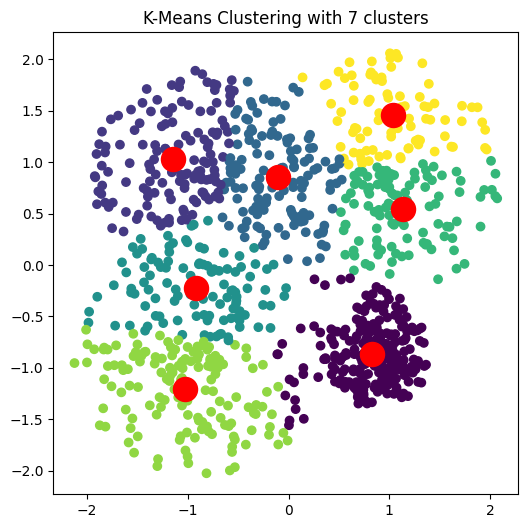

/Users/johanlind/PycharmProjects/MLLab1/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


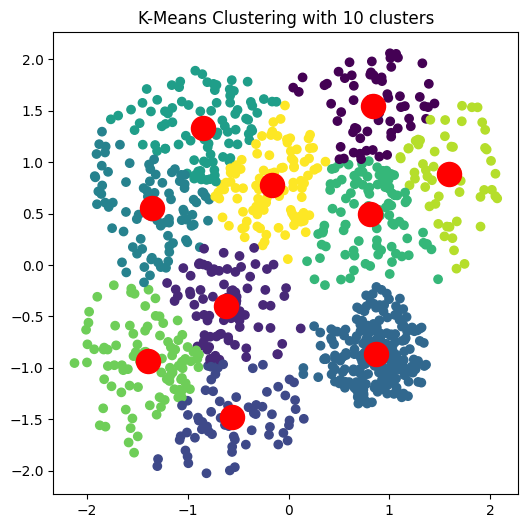

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = scipy.io.loadmat(r'./../datasets/simplecluster.mat')
X = data['X']
print(X.shape)
   
# ====================== YOUR CODE HERE ======================
# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


# plot the data before and after normalization,
plt.figure(figsize=[6,6])
plt.scatter(X[:,0], X[:,1],
            edgecolors='r')
plt.title('Original Data')
plt.show()

plt.figure(figsize=[6,6])
plt.scatter(X_normalized[:,0], X_normalized[:,1],
            edgecolors='r')
plt.title('Normalized Data')
plt.show()


# (optional) print mean and standard deviation before and after normalization
print(f'Normalized shape: {X_normalized.shape}')
print(f'Normalized mean: {np.mean(X_normalized)}, Normalized std: {np.std(X_normalized)}')

# use KMeans to fit the data with n_clusters using kmeans = KMeans(n_clusters=k).fit(X)
# Plot the clusters using different values for n_clusters. You can use kmeans.labels_ and kmeans.cluster_centers_ for
# plotting the cluster centroids and coloring the clusters in different colors

ks = [3, 5, 7, 10]
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_normalized)
    
    plt.figure(figsize=(6, 6))

    plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=kmeans.labels_)

    # Display centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
    
    plt.title(f'K-Means Clustering with {k} clusters')
    plt.show()

# ============================================================
    

## Part 3 - Classification

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load data
data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
x = data['X'] 
y = data['y'].flatten()
print(x.shape,y.shape)

# ====================== YOUR CODE HERE ======================
# You can use PCA here to set x = PCA(n_components=N).fit_transform(x) with different values for N
N = [2, 3, 4, 6, 8, 10]
for n in N:
    print(f'PCA with N = {n}')
    pca = PCA(n_components=n)
    xTransformed = pca.fit_transform(x)
    
    # ============================================================
    
    # Split the data into training and test sets (70% train, 30% test)
    trainX, testX, trainy, testy = train_test_split(xTransformed, y, test_size=0.3, random_state=1)
    
    # ====================== YOUR CODE HERE ======================
    # Train a DT, kNN, and NB classifier and calculate the classification accuracies on the test set
    
    DT = DecisionTreeClassifier()
    DT.fit(trainX,trainy)
    y_pred_DT = DT.predict(testX)
    accuracy_DT = accuracy_score(testy, y_pred_DT)
    print(f'Decision Tree accuracy: {accuracy_DT * 100:.2f}%')
    
    kNN = KNeighborsClassifier()
    kNN.fit(trainX, trainy)
    y_pred_kNN = kNN.predict(testX)
    accuracy_kNN = accuracy_score(testy, y_pred_kNN)
    print(f'k-Nearest Neighbors accuracy: {accuracy_kNN * 100:.2f}%')
    
    NB = GaussianNB()
    NB.fit(trainX,trainy)
    y_pred_NB = NB.predict(testX)
    accuracy_NB = accuracy_score(testy, y_pred_NB)
    print(f'Naive Bayes accuracy: {accuracy_NB * 100:.2f}%')

# ============================================================


(5000, 400) (5000,)
PCA with N = 2
Decision Tree accuracy: 38.13%
k-Nearest Neighbors accuracy: 42.80%
Naive Bayes accuracy: 43.47%
PCA with N = 3
Decision Tree accuracy: 42.07%
k-Nearest Neighbors accuracy: 48.87%
Naive Bayes accuracy: 44.53%
PCA with N = 4
Decision Tree accuracy: 55.80%
k-Nearest Neighbors accuracy: 65.47%
Naive Bayes accuracy: 58.20%
PCA with N = 6
Decision Tree accuracy: 67.80%
k-Nearest Neighbors accuracy: 81.33%
Naive Bayes accuracy: 69.73%
PCA with N = 8
Decision Tree accuracy: 74.27%
k-Nearest Neighbors accuracy: 88.87%
Naive Bayes accuracy: 76.67%
PCA with N = 10
Decision Tree accuracy: 73.87%
k-Nearest Neighbors accuracy: 89.73%
Naive Bayes accuracy: 76.80%


## Part 4 - Logistic Regression for multi-class classification

In [4]:
import scipy.io
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from scipy.optimize import fmin_tnc
from scipy.optimize import minimize

# Load data
data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
X = data['X']
y = data['y'].flatten()

def sigmoid(z):
    # ====================== YOUR CODE HERE ======================
    output = 1 / (1 + np.exp(-z))
    # ============================================================
    return output

def cost_gradient(theta, X, y, lambda_=0):
    m = len(y)
    # ====================== YOUR CODE HERE ======================
    
    h = sigmoid(np.dot(X, theta))
    
    cost = -(1/m) * np.sum(y.T*np.log(h) + (1-y).T*np.log(1-h))
    gradient = (1.0 / m) * X.T.dot(h-y)
    
    # ============================================================
    return cost, gradient # the cost should be 1 value and gradient shape (401,)

def trainLogisticReg(X, y, lambda_):
   
    m, n = X.shape
    num_labels = len(np.unique(y))
    all_theta = np.zeros((n+1, num_labels))
    initial_theta = np.zeros(n+1)

    # Add ones to the X data matrix
    X = np.hstack((np.ones((m, 1)), X))

    # ====================== YOUR CODE HERE ======================
    # Complete the following code to train 10 (num_labels) logistic regression 
    # classifiers with regularization parameter lambda. You can use y == c to 
    # obtain a vector of 1's and 0's that tell us whether the ground truth is 
    # true/false for this class. Use a for-loop to loop to train a logistic 
    # regressor classifier for each class. 
    # The output should be all_theta where the ith column is the theta values for
    # the logistic binary classifier of class i-vs-all other classes. 
    
    for c in range(num_labels):
        labels = (y == c).astype(int)
        
        result = minimize(fun=cost_gradient, x0=initial_theta, args=(X, labels, lambda_), method='TNC', jac=True)
        
        all_theta[:, c] = result.x

    # ============================================================
    return all_theta

def predictLogisticReg(all_theta, X):
    m = X.shape[0]
    X = np.hstack((np.ones((m, 1)), X))
    probabilities = sigmoid(X @ all_theta)
    # ====================== YOUR CODE HERE ======================
    # Calculate the predicted class for each sample (rows in probabilities) as the argmax of the probabilities 
    # for each classifier (columns)
    pred_classes = np.argmax(probabilities, axis=1)
    # ============================================================
    
    return pred_classes

# Split into train, val, and test set (60/30/10)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=1)

# ====================== YOUR CODE HERE ======================
# Use trainLogisticReg to get the theta for all 10 classifiers in all_theta and use it with predictLogisticReg
# to calculate the train, val, and test set accuracies.

lambda_ = 0.1
all_theta = trainLogisticReg(X_train, y_train, lambda_)

pred_train = predictLogisticReg(all_theta, X_train)
accuracy_train = np.mean(pred_train == y_train) * 100
print(f'Training set accuracy: {accuracy_train:.2f}%')

pred_val = predictLogisticReg(all_theta, X_val)
accuracy_val = np.mean(pred_val == y_val) * 100
print(f'Validation set accuracy: {accuracy_val:.2f}%')

pred_test = predictLogisticReg(all_theta, X_test)
accuracy_test = np.mean(pred_test == y_test) * 100
print(f'Test set accuracy: {accuracy_test:.2f}%')

 # ============================================================
    

/var/folders/hj/yrzp_6d94g91tf5mbs7ysj_80000gn/T/ipykernel_67418/1799554440.py:26: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(y.T*np.log(h) + (1-y).T*np.log(1-h))
/var/folders/hj/yrzp_6d94g91tf5mbs7ysj_80000gn/T/ipykernel_67418/1799554440.py:26: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(y.T*np.log(h) + (1-y).T*np.log(1-h))


Training set accuracy: 87.93%
Validation set accuracy: 77.00%
Test set accuracy: 77.60%


## Part 5 - Logistic Regression with L2-regularization

In [5]:
# ====================== YOUR CODE HERE ======================
# You can copy the code from part 4 in here and continue from that
# ============================================================

import scipy.io
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from scipy.optimize import fmin_tnc
from scipy.optimize import minimize

# Load data
data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
X = data['X']
y = data['y'].flatten()

def sigmoid(z):
    # ====================== YOUR CODE HERE ======================
    output = 1 / (1 + np.exp(-z))
    # ============================================================
    return output

def cost_gradient(theta, X, y, lambda_=0):
    m = len(y)
    # ====================== YOUR CODE HERE ======================
    
    h = sigmoid(np.dot(X, theta))
    
    cost = -(1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h))) + (lambda_/(2*m)) * np.sum(np.square(theta[1:]))
    
    gradient = (1/m) * np.dot(X.T, (h - y))
    gradient[1:] = gradient[1:] + (lambda_/m) * theta[1:]
    
    # ============================================================
    return cost, gradient # the cost should be 1 value and gradient shape (401,)

def trainLogisticReg(X, y, lambda_):
   
    m, n = X.shape
    num_labels = len(np.unique(y))
    all_theta = np.zeros((n+1, num_labels))
    initial_theta = np.zeros(n+1)

    # Add ones to the X data matrix
    X = np.hstack((np.ones((m, 1)), X))

    # ====================== YOUR CODE HERE ======================
    # Complete the following code to train 10 (num_labels) logistic regression 
    # classifiers with regularization parameter lambda. You can use y == c to 
    # obtain a vector of 1's and 0's that tell us whether the ground truth is 
    # true/false for this class. Use a for-loop to loop to train a logistic 
    # regressor classifier for each class. 
    # The output should be all_theta where the ith column is the theta values for
    # the logistic binary classifier of class i-vs-all other classes. 
    
    for c in range(num_labels):
        labels = (y == c).astype(int)
        
        result = minimize(fun=cost_gradient, x0=initial_theta, args=(X, labels, lambda_), method='TNC', jac=True)
        
        all_theta[:, c] = result.x

    # ============================================================
    return all_theta

def predictLogisticReg(all_theta, X):
    m = X.shape[0]
    X = np.hstack((np.ones((m, 1)), X))
    probabilities = sigmoid(X @ all_theta)
    # ====================== YOUR CODE HERE ======================
    # Calculate the predicted class for each sample (rows in probabilities) as the argmax of the probabilities 
    # for each classifier (columns)
    pred_classes = np.argmax(probabilities, axis=1)
    # ============================================================
    
    return pred_classes

# Split into train, val, and test set (60/30/10)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=1)

# ====================== YOUR CODE HERE ======================
# Use trainLogisticReg to get the theta for all 10 classifiers in all_theta and use it with predictLogisticReg
# to calculate the train, val, and test set accuracies.

lambda_ = 0.1
all_theta = trainLogisticReg(X_train, y_train, lambda_)

pred_train = predictLogisticReg(all_theta, X_train)
accuracy_train = np.mean(pred_train == y_train) * 100
print(f'Training set accuracy: {accuracy_train:.2f}%')

pred_val = predictLogisticReg(all_theta, X_val)
accuracy_val = np.mean(pred_val == y_val) * 100
print(f'Validation set accuracy: {accuracy_val:.2f}%')

pred_test = predictLogisticReg(all_theta, X_test)
accuracy_test = np.mean(pred_test == y_test) * 100
print(f'Test set accuracy: {accuracy_test:.2f}%')

 # ============================================================


Training set accuracy: 87.40%
Validation set accuracy: 79.13%
Test set accuracy: 79.80%


## Part 6 - Bias-variance analysis on Logistic Regression

In [6]:
# ====================== YOUR CODE HERE ======================




# ============================================================



# Exercises for Pass with distinction (VG)

## Reconstruction from dimensionality reduction model

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.io

# ====================== YOUR CODE HERE ======================
# Hint: the reconstruction is the projected data in K dimensions multiplied with the first K principal components

# ============================================================



## Implementation of k-means

In [8]:
import numpy as np

data = scipy.io.loadmat(r'./../datasets/simplecluster.mat')
X = data['X']
print(X.shape)
n_clusters=[2,3,5,10]

# ====================== YOUR CODE HERE ======================
def k_means(...

return ...

    
# ============================================================




SyntaxError: invalid syntax (338280394.py, line 9)

## Plot original images of MNIST from k-means clustering

In [ ]:
import matplotlib.pyplot as plt

data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
x = data['X']
y = data['y'].flatten()
print(x.shape,y.shape)

# ====================== YOUR CODE HERE ======================


# ============================================================

## Plot learning curves

In [ ]:
import matplotlib.pyplot as plt
import scipy.io
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = scipy.io.loadmat(r'./../datasets/smallMNIST.mat')
X = data['X'][::2]  # Subsample data for faster training
y = data['y'][::2].flatten()

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=1)

# ====================== YOUR CODE HERE ======================




# ============================================================







